In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from env import user, password, host
import wrangle

### In these exercises, you will complete the first step toward the above goal: acquire and prepare the necessary Zillow data from the zillow database in the Codeup database server.

1. Acquire bedroomcnt, bathroomcnt, calculatedfinishedsquarefeet, taxvaluedollarcnt, yearbuilt, taxamount, and fips from the zillow database for all 'Single Family Residential' properties.
2. Using your acquired Zillow data, walk through the summarization and cleaning steps in your wrangle.ipynb file like we did above. You may handle the missing values however you feel is appropriate and meaninful; remember to document your process and decisions using markdown and code commenting where helpful.
3. Store all of the necessary functions to automate your process from acquiring the data to returning a cleaned dataframe witn no missing values in your wrangle.py file. Name your final function wrangle_zillow.

In [2]:
dd = pd.read_excel('zillow_data_dictionary.xlsx')
dd

,Feature,Description
0,'airconditioningtypeid',Type of cooling system present in the home (i...
1,'architecturalstyletypeid',"Architectural style of the home (i.e. ranch, ..."
2,'basementsqft',Finished living area below or partially below...
3,'bathroomcnt',Number of bathrooms in home including fractio...
4,'bedroomcnt',Number of bedrooms in home
5,'buildingqualitytypeid',Overall assessment of condition of the buildi...
6,'buildingclasstypeid',"The building framing type (steel frame, wood f..."
7,'calculatedbathnbr',Number of bathrooms in home including fractio...
8,'decktypeid',Type of deck (if any) present on parcel
9,'threequarterbathnbr',Number of 3/4 bathrooms in house (shower + si...


### ACQUIRE the data

In [3]:
df = wrangle.get_zillow_data()

In [4]:
# Running .info(). Every column is a float.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2152864 entries, 0 to 2152863
Data columns (total 7 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   bedroomcnt                    float64
 1   bathroomcnt                   float64
 2   calculatedfinishedsquarefeet  float64
 3   taxvaluedollarcnt             float64
 4   yearbuilt                     float64
 5   taxamount                     float64
 6   fips                          float64
dtypes: float64(7)
memory usage: 115.0 MB


In [5]:
# rename columns - shorten and makes more sense

df = df.rename(columns = {'bedroomcnt':'bedrooms', 
                          'bathroomcnt':'bathrooms', 
                          'calculatedfinishedsquarefeet':'area',
                          'taxvaluedollarcnt':'tax_value', 
                          'yearbuilt':'year_built'})

In [6]:
df.shape
# 2152864 rows and 7 columns coming in.

(2152864, 7)

In [7]:
# Display readable summary statistics for numeric columns.
df.describe().T

,count,mean,std,min,25%,50%,75%,max
bedrooms,2152853.0,3.287195,0.954757,0.00,3.0000,3.000,4.0000,25.00
bathrooms,2152853.0,2.230687,0.999281,0.00,2.0000,2.000,3.0000,32.00
area,2144379.0,1862.855178,1222.125124,1.00,1257.0000,1623.000,2208.0000,952576.00
tax_value,2152371.0,461896.052361,699675.940049,1.00,188170.0000,327671.000,534527.0000,98428909.00
year_built,2143526.0,1960.949681,22.162196,1801.00,1949.0000,1958.000,1976.0000,2016.00
taxamount,2148422.0,5634.863752,8178.908996,1.85,2534.9725,4108.945,6414.3175,1337755.86
fips,2152864.0,6048.377330,20.433289,6037.00,6037.0000,6037.000,6059.0000,6111.00


In [8]:
# Find the total number of Null values in each column of our DataFrame.

df.isnull().sum()

bedrooms        11
bathrooms       11
area          8485
tax_value      493
year_built    9338
taxamount     4442
fips             0
dtype: int64

In [9]:
# Check for any Null values in each column of our DataFrame.

df.isnull().any()

bedrooms       True
bathrooms      True
area           True
tax_value      True
year_built     True
taxamount      True
fips          False
dtype: bool

In [10]:
# Return the names for any columns in our DataFrame with any Null values.

df.columns[df.isnull().any()]

Index(['bedrooms', 'bathrooms', 'area', 'tax_value', 'year_built',
       'taxamount'],
      dtype='object')

In [11]:
# Check out the values and their frequencies from bedrooms column.

df.bedrooms.value_counts(dropna=False, ascending=True)

25.0         1
16.0         2
18.0         3
15.0         6
14.0         7
NaN         11
12.0        12
13.0        16
11.0        34
10.0       121
9.0        291
8.0       1107
7.0       4807
0.0      13188
1.0      23166
6.0      25166
5.0     150866
2.0     335473
4.0     634289
3.0     964298
Name: bedrooms, dtype: int64

In [12]:
# Check out the values and their frequencies from bathrooms column.

df.bathrooms.value_counts(dropna=False, ascending=True)

19.00         1
32.00         1
19.50         1
14.50         1
12.50         3
11.50         3
1.75          3
17.00         4
20.00         6
18.00         8
NaN          11
16.00        12
10.50        14
0.50         16
15.00        17
14.00        25
13.00        39
9.50         50
12.00        73
8.50        110
11.00       146
10.00       325
7.50        384
9.00        713
6.50       1333
8.00       1692
7.00       4394
5.50       6217
6.00      10747
0.00      13028
4.50      19506
5.00      28362
3.50      28518
1.50      31211
4.00      82155
2.50     142981
1.00     414324
3.00     422841
2.00     943589
Name: bathrooms, dtype: int64

In [13]:
# Check out the values and their frequencies from area column.

df.area.value_counts(dropna=False, ascending=True)

24920.0       1
10127.0       1
35046.0       1
8803.0        1
16134.0       1
           ... 
1400.0     3833
1120.0     4362
1080.0     4389
1200.0     5195
NaN        8485
Name: area, Length: 10581, dtype: int64

In [14]:
df.tax_value.value_counts(dropna=False, ascending=True)

27516.0        1
167020.0       1
145983.0       1
81898.0        1
1503486.0      1
            ... 
440000.0     685
430000.0     690
400000.0     729
500000.0     779
450000.0     821
Name: tax_value, Length: 592270, dtype: int64

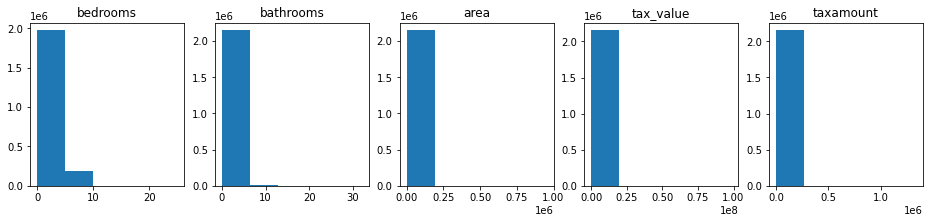

In [15]:
plt.figure(figsize=(16, 3))

# List of columns
cols = [col for col in df.columns if col not in ['fips', 'year_built']]

for i, col in enumerate(cols):

    # i starts at 0, but plot nos should start at 1
    plot_number = i + 1 

    # Create subplot.
    plt.subplot(1, len(cols), plot_number)

    # Title with column name.
    plt.title(col)

    # Display histogram for column.
    df[col].hist(bins=5)

    # Hide gridlines.
    plt.grid(False)
    
    # turn off scientific notation
    plt.ticklabel_format(useOffset=False)
    
plt.show()